In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np

# 1. Load Data
df = pd.read_csv('ecommerce_analysis_dataset_enriched.csv')


In [2]:
# 2. Show missing values
print("Missing values before filling:")
print(df.isnull().sum())
print("\nMissing value ratios (%):")
print(df.isnull().sum() / len(df) * 100)

Missing values before filling:
Order ID             0
Order Date           0
Delivery Date        0
Delivery Time        6
Gender               0
Age Group            6
City                11
Product Category     0
Discount Rate        7
Customer Type        0
Return Status        0
Weather              0
dtype: int64

Missing value ratios (%):
Order ID            0.0
Order Date          0.0
Delivery Date       0.0
Delivery Time       3.0
Gender              0.0
Age Group           3.0
City                5.5
Product Category    0.0
Discount Rate       3.5
Customer Type       0.0
Return Status       0.0
Weather             0.0
dtype: float64


In [3]:
# 3. Fill missing values with logical replacements
# Age Group: fill with mode (most frequent)
df['Age Group'] = df['Age Group'].fillna(df['Age Group'].mode()[0])

# Delivery Time: fill with mean (rounded)
df['Delivery Time'] = df['Delivery Time'].fillna(round(df['Delivery Time'].mean()))

# Discount Rate: fill with mean
df['Discount Rate'] = df['Discount Rate'].fillna(df['Discount Rate'].mean())

# City: fill with mode
df['City'] = df['City'].fillna(df['City'].mode()[0])

print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Order ID            0
Order Date          0
Delivery Date       0
Delivery Time       0
Gender              0
Age Group           0
City                0
Product Category    0
Discount Rate       0
Customer Type       0
Return Status       0
Weather             0
dtype: int64



HYPOTHESIS 1: Effect of Discount Rate on Order Volume
H₀: Daily order volume is not significantly different between days with discounts vs. no discounts
H₁: Days with discounts have significantly different order volumes compared to days without discounts


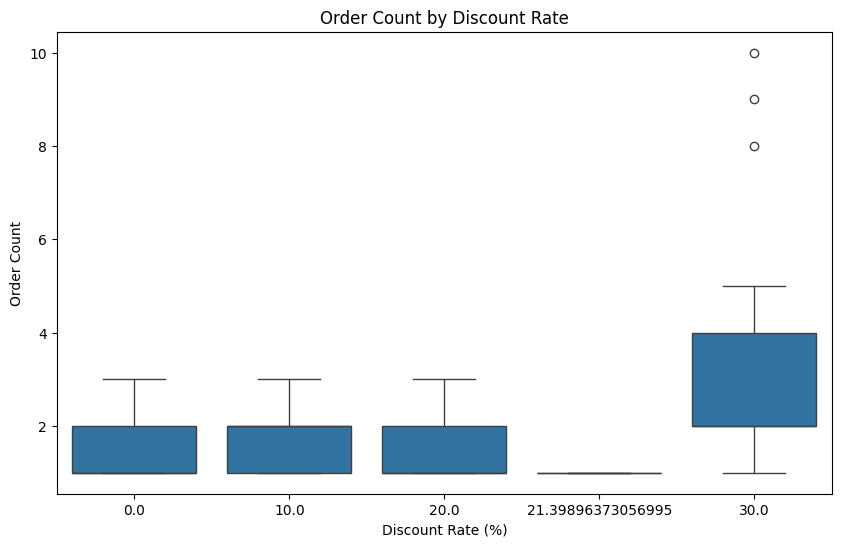

p-value: 0.00000143
Decision: We reject H₀


In [4]:
# 5. Hypothesis Tests and Visualizations

# HYPOTHESIS 1: Effect of Discount Rate on Order Volume
print("\nHYPOTHESIS 1: Effect of Discount Rate on Order Volume")
print("H₀: Daily order volume is not significantly different between days with discounts vs. no discounts")
print("H₁: Days with discounts have significantly different order volumes compared to days without discounts")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Rate', y='Order Count',
            data=df.groupby(['Order Date', 'Discount Rate']).size().reset_index(name='Order Count'))
plt.title('Order Count by Discount Rate')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Order Count')
plt.show()

# T-test: Discounted vs Non-discounted days
discounted = df[df['Discount Rate'] > 0].groupby('Order Date').size()
non_discounted = df[df['Discount Rate'] == 0].groupby('Order Date').size()
t_stat, p_value = stats.ttest_ind(discounted, non_discounted)
print(f"p-value: {p_value:.8f}")
if p_value < 0.05:
    print("Decision: We reject H₀")
else:
    print("Decision: Fail to reject H₀")


HYPOTHESIS 2: Effect of Weather on Order Volume
H₀: Weather conditions (sunny vs. rainy) do not affect daily order volume
H₁: Weather conditions significantly affect daily order volume


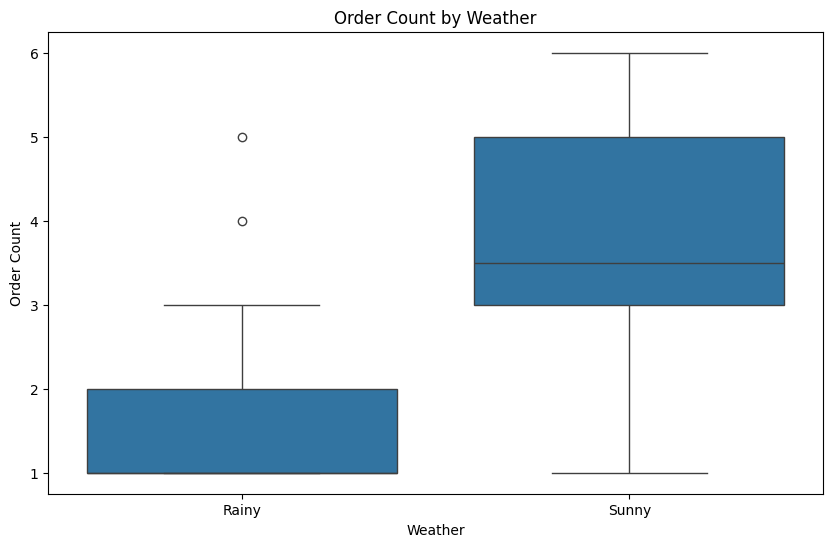

p-value: 0.00000007
Decision: We reject H₀


In [5]:
# HYPOTHESIS 2: Effect of Weather on Order Volume
print("\nHYPOTHESIS 2: Effect of Weather on Order Volume")
print("H₀: Weather conditions (sunny vs. rainy) do not affect daily order volume")
print("H₁: Weather conditions significantly affect daily order volume")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Order Count',
            data=df.groupby(['Order Date', 'Weather']).size().reset_index(name='Order Count'))
plt.title('Order Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Order Count')
plt.show()

# T-test: Sunny vs Rainy days
sunny = df[df['Weather'] == 'Sunny'].groupby('Order Date').size()
rainy = df[df['Weather'] == 'Rainy'].groupby('Order Date').size()
t_stat, p_value = stats.ttest_ind(sunny, rainy)
print(f"p-value: {p_value:.8f}")
if p_value < 0.05:
    print("Decision: We reject H₀")
else:
    print("Decision: Fail to reject H₀")


HYPOTHESIS 3: Effect of Delivery Time on Return Status
H₀: There is no correlation between delivery time and return status
H₁: There is a significant correlation between delivery time and return status


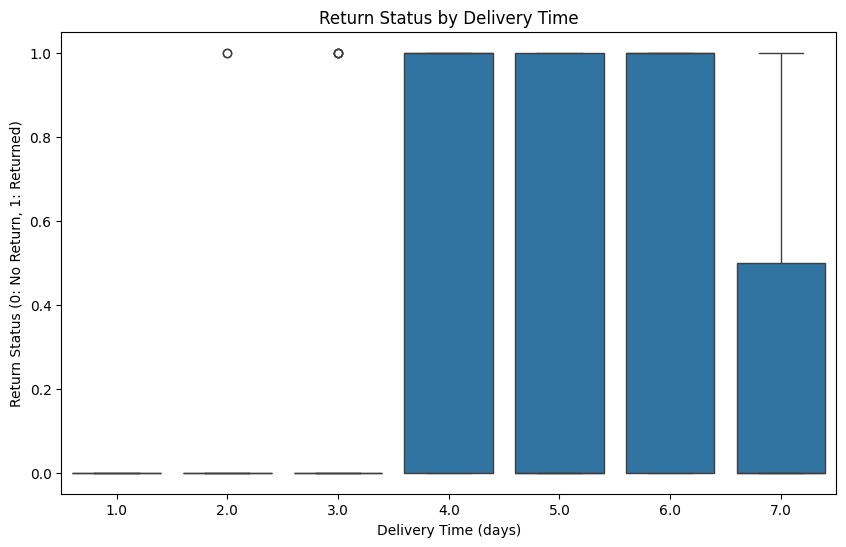

p-value: 0.00000199
Decision: We reject H₀


In [6]:
# HYPOTHESIS 3: Effect of Delivery Time on Return Status
print("\nHYPOTHESIS 3: Effect of Delivery Time on Return Status")
print("H₀: There is no correlation between delivery time and return status")
print("H₁: There is a significant correlation between delivery time and return status")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery Time', y='Return Status', data=df)
plt.title('Return Status by Delivery Time')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Return Status (0: No Return, 1: Returned)')
plt.show()

# Correlation: Delivery Time and Return Status
correlation, p_value = stats.pointbiserialr(df['Delivery Time'], df['Return Status'])
print(f"p-value: {p_value:.8f}")
if p_value < 0.05:
    print("Decision: We reject H₀")
else:
    print("Decision: Fail to reject H₀")



HYPOTHESIS 4: New vs Returning Customers and Return Status
H₀: There is no association between customer type and return status
H₁: There is a significant association between customer type and return status


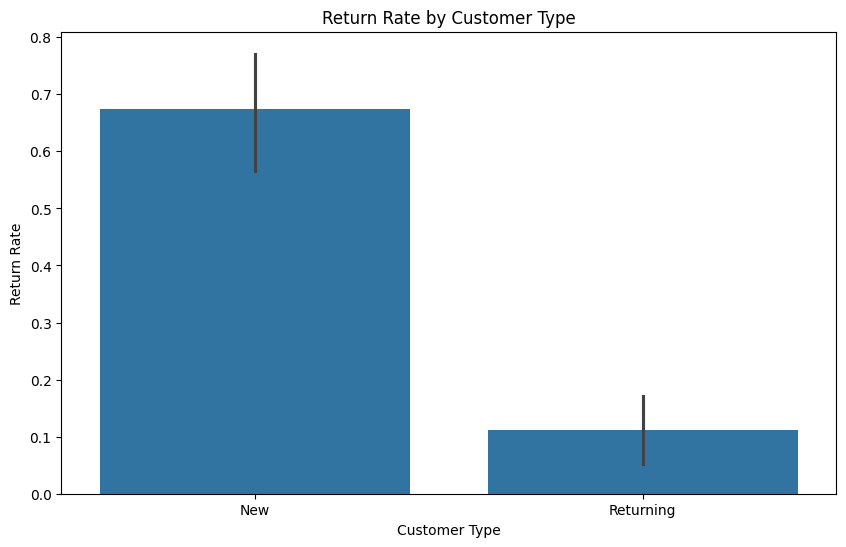

p-value: 0.00000000
Decision: We reject H₀


In [7]:
# HYPOTHESIS 4: New vs Returning Customers and Return Status
print("\nHYPOTHESIS 4: New vs Returning Customers and Return Status")
print("H₀: There is no association between customer type and return status")
print("H₁: There is a significant association between customer type and return status")

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Type', y='Return Status', data=df)
plt.title('Return Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Return Rate')
plt.show()

# Chi-square test
contingency_table = pd.crosstab(df['Customer Type'], df['Return Status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p_value:.8f}")
if p_value < 0.05:
    print("Decision: We reject H₀")
else:
    print("Decision: Fail to reject H₀")

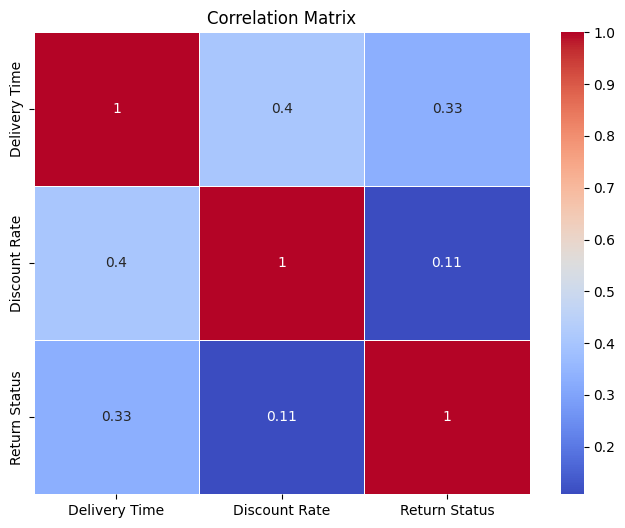

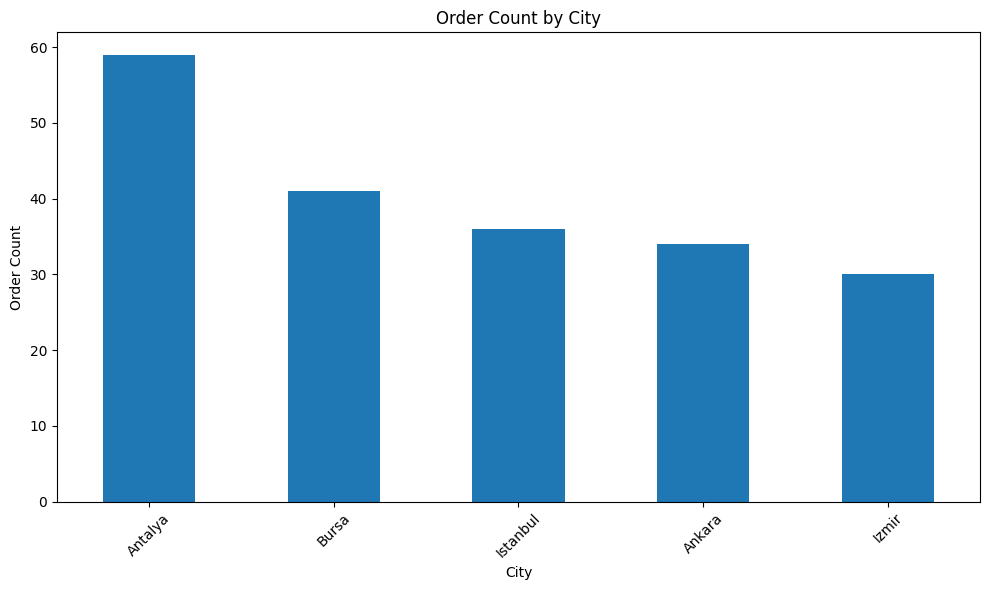

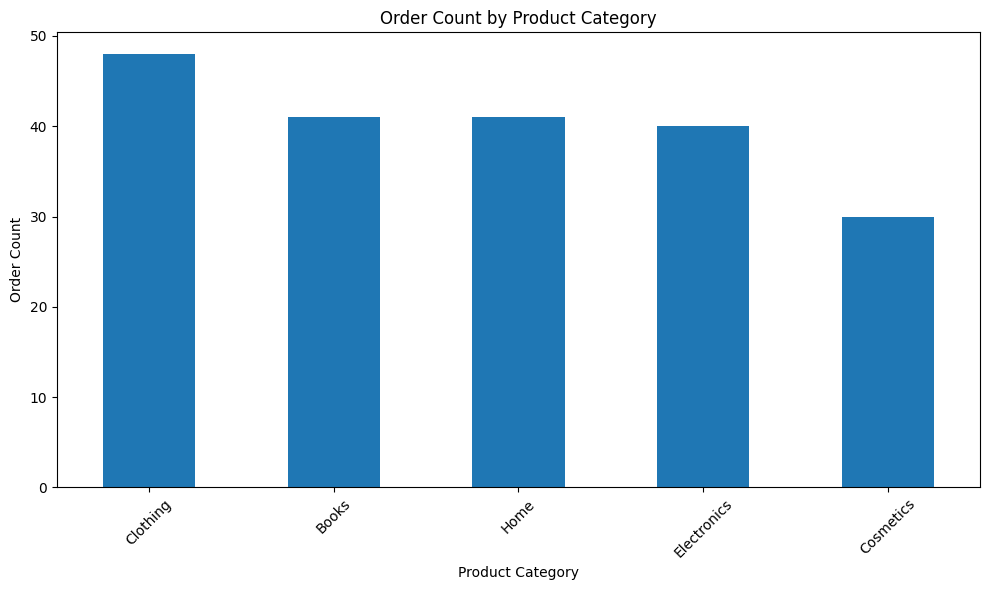

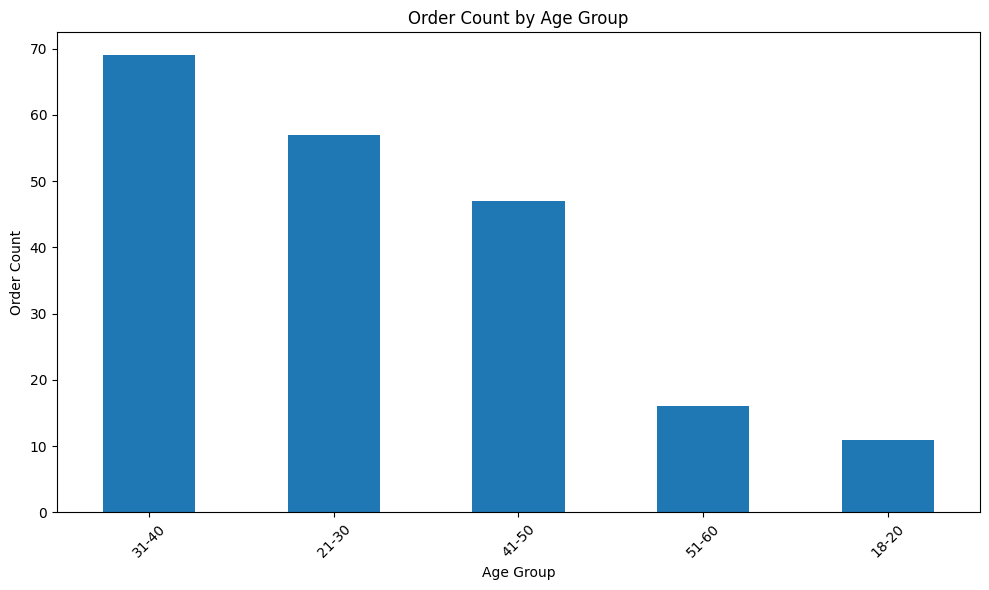

In [8]:
# 6. Additional Visualizations

# Correlation Matrix
numeric_cols = ['Delivery Time', 'Discount Rate', 'Return Status']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Orders by City
plt.figure(figsize=(10, 6))
df['City'].value_counts().plot(kind='bar')
plt.title('Order Count by City')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Orders by Product Category
plt.figure(figsize=(10, 6))
df['Product Category'].value_counts().plot(kind='bar')
plt.title('Order Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Orders by Age Group
plt.figure(figsize=(10, 6))
df['Age Group'].value_counts().plot(kind='bar')
plt.title('Order Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Logistic Regression Results:
 - Accuracy: 0.55
              precision    recall  f1-score   support

         0.0       0.63      0.77      0.69        53
         1.0       0.20      0.11      0.14        27

    accuracy                           0.55        80
   macro avg       0.42      0.44      0.42        80
weighted avg       0.49      0.55      0.51        80



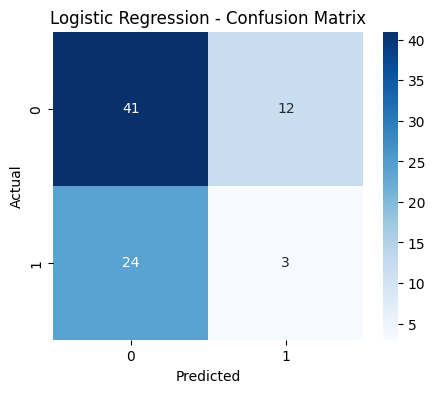

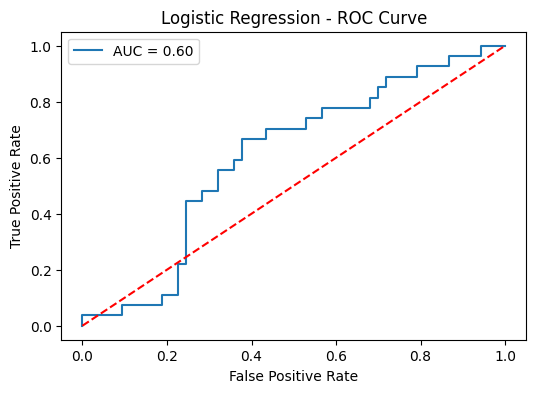

Decision Tree Results:
 - Accuracy: 0.64
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72        53
         1.0       0.47      0.52      0.49        27

    accuracy                           0.64        80
   macro avg       0.60      0.61      0.60        80
weighted avg       0.65      0.64      0.64        80



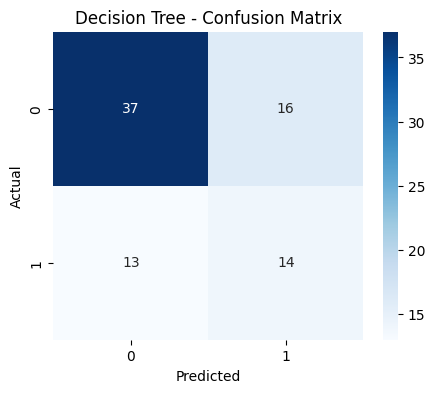

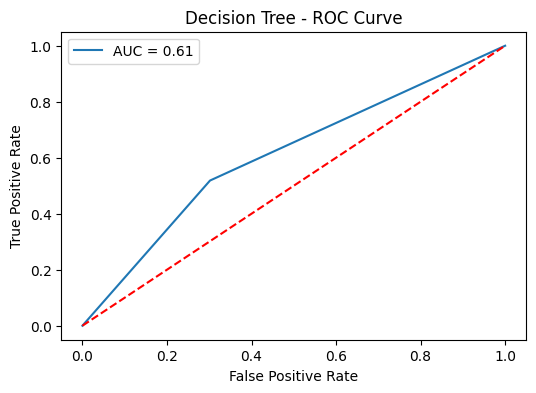

Random Forest Results:
 - Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        53
         1.0       1.00      0.07      0.14        27

    accuracy                           0.69        80
   macro avg       0.84      0.54      0.47        80
weighted avg       0.79      0.69      0.58        80



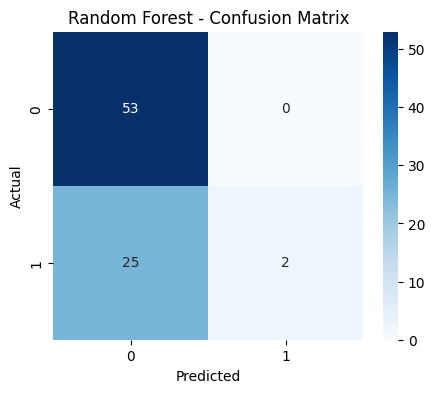

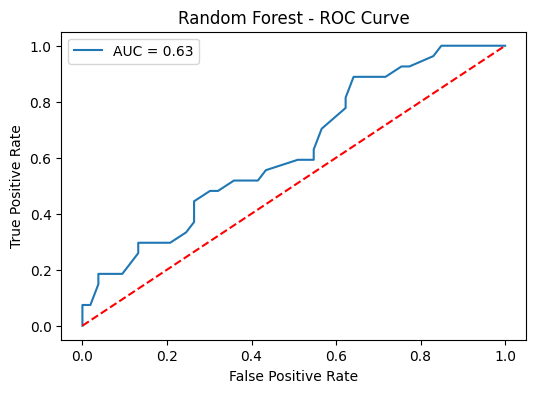

Best Performing Model: Random Forest with Accuracy = 0.69


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc



# Kimlik ve gereksiz sütunları çıkar
kimlik_sutunlari = ['Order ID', 'Customer ID', 'Product Name', 'Brand']
for col in kimlik_sutunlari:
    if col in df.columns:
        df = df.drop(col, axis=1)

# Eksik verileri kaldır
df = df.dropna()

# Kategorik sütunları kodla
kategorik_sutunlar = df.select_dtypes(include=['object', 'category']).columns.tolist()
if kategorik_sutunlar:
    df = pd.get_dummies(df, columns=kategorik_sutunlar)

# X ve y tanımla
X = df.drop('Return Status', axis=1)
y = df['Return Status']

# Eğitim ve test kümeleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"Accuracy": acc}
    print(f"{name} Results:\n - Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve (binary classification)
    if len(y.unique()) == 2:
        y_score = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"{name} - ROC Curve")
        plt.legend()
        plt.show()

best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"Best Performing Model: {best_model} with Accuracy = {results[best_model]['Accuracy']:.2f}")

Linear Regression Results:
 - Mean Squared Error: 5.23
 - R² Score: -0.28


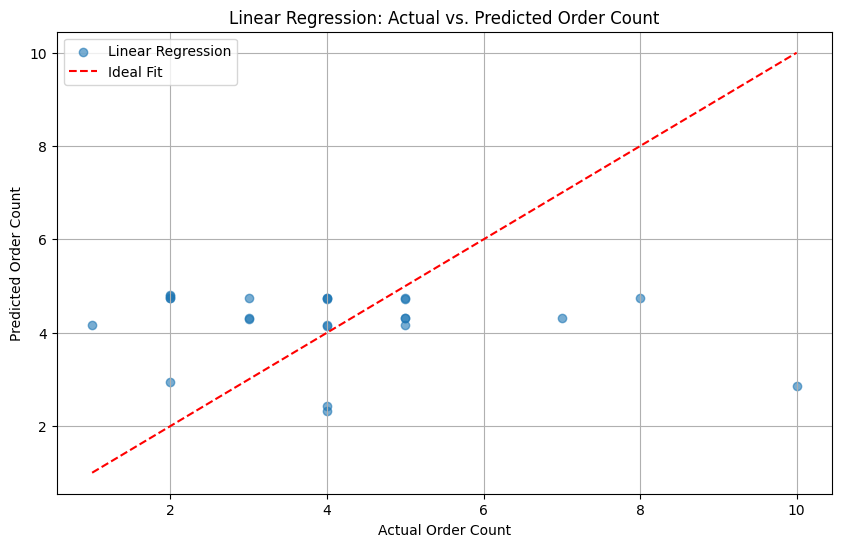

Decision Tree Results:
 - Mean Squared Error: 5.78
 - R² Score: -0.42


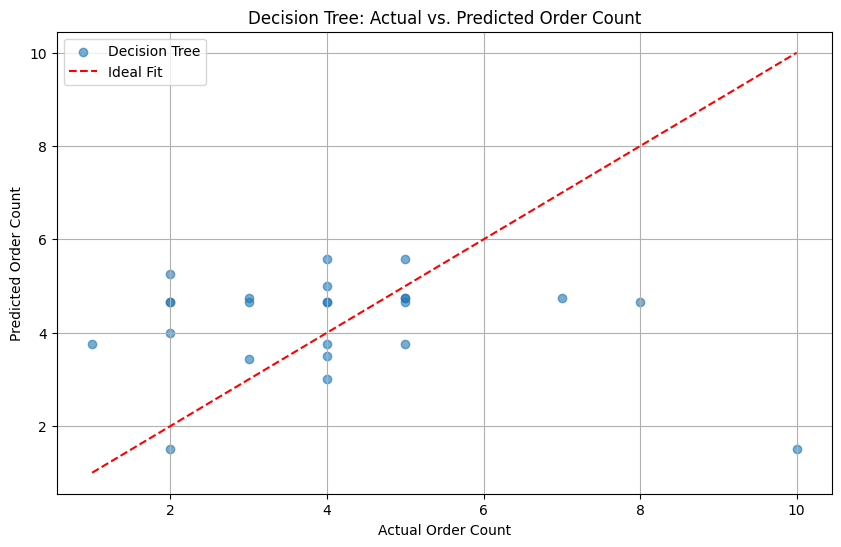

Random Forest Results:
 - Mean Squared Error: 5.74
 - R² Score: -0.41


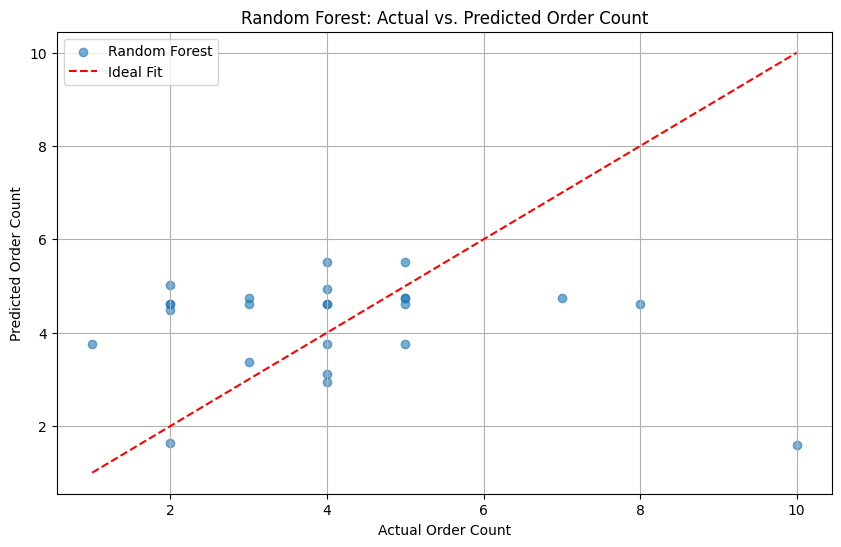

Best Performing Model: Linear Regression with R² = -0.28


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Tarih sütununu datetime'a çevir
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Günlük sipariş sayısını hesapla
daily_orders = df.groupby('Order Date').size().reset_index(name='Order Count')

# Eksik değerler nedeniyle güvenli mode fonksiyonu
def safe_mode(x):
    m = x.mode()
    if len(m) > 0:
        return m[0]
    else:
        return np.nan

# Hava durumu, indirim, hafta içi/sonu gibi ek özellikleri ekle
daily_features = df.groupby('Order Date').agg({
    'Weather': safe_mode,
    'Discount Rate': safe_mode
}).reset_index()

# Hafta sonu özelliği
daily_features['IsWeekend'] = daily_features['Order Date'].dt.dayofweek >= 5

# Tüm özellikleri birleştir
daily_orders = daily_orders.merge(daily_features, on='Order Date')

# Eksik değerleri doldur (mode veya medyan ile)
for col in ['Weather', 'Discount Rate']:
    if daily_orders[col].isnull().any():
        if daily_orders[col].dtype == 'O':
            daily_orders[col] = daily_orders[col].fillna(daily_orders[col].mode()[0])
        else:
            daily_orders[col] = daily_orders[col].fillna(daily_orders[col].median())

# Kategorik değişkenleri kodla
daily_orders = pd.get_dummies(daily_orders, columns=['Weather', 'Discount Rate'], drop_first=True)

# X ve y tanımla
X = daily_orders.drop(['Order Date', 'Order Count'], axis=1)
y = daily_orders['Order Count']

# Eğitim ve test kümeleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} Results:\n - Mean Squared Error: {mse:.2f}\n - R² Score: {r2:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{name}: Actual vs. Predicted Order Count")
    plt.xlabel("Actual Order Count")
    plt.ylabel("Predicted Order Count")
    plt.legend()
    plt.grid(True)
    plt.show()

best_model = max(results, key=lambda x: results[x]['R²'])
print(f"Best Performing Model: {best_model} with R² = {results[best_model]['R²']:.2f}")

In [9]:
# 7. Summary Statistics
print("\nSummary Statistics:")
print("\nDelivery Time Statistics:")
print(df['Delivery Time'].describe())
print("\nReturn Rate:", df['Return Status'].mean())
print("\nAverage Discount Rate:", df['Discount Rate'].mean())

print("\nCategorical Variable Distributions:")
print("\nCustomer Type Distribution:")
print(df['Customer Type'].value_counts(normalize=True))
print("\nWeather Distribution:")
print(df['Weather'].value_counts(normalize=True))
print("\nProduct Category Distribution:")
print(df['Product Category'].value_counts(normalize=True))


Summary Statistics:

Delivery Time Statistics:
count    200.000000
mean       3.985000
std        1.444023
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Delivery Time, dtype: float64

Return Rate: 0.345

Average Discount Rate: 21.39896373056995

Categorical Variable Distributions:

Customer Type Distribution:
Customer Type
Returning    0.585
New          0.415
Name: proportion, dtype: float64

Weather Distribution:
Weather
Sunny    0.725
Rainy    0.275
Name: proportion, dtype: float64

Product Category Distribution:
Product Category
Clothing       0.240
Books          0.205
Home           0.205
Electronics    0.200
Cosmetics      0.150
Name: proportion, dtype: float64
